   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
K=1, Accuracy=0.9778


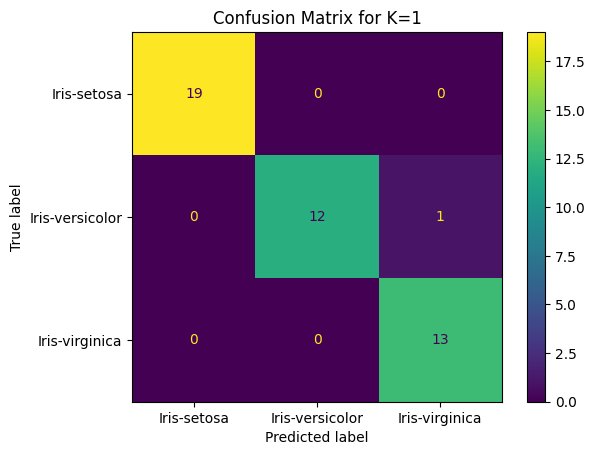

K=3, Accuracy=1.0000


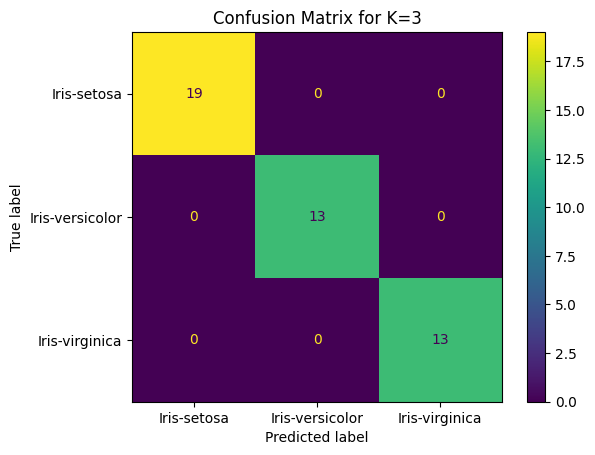

K=5, Accuracy=1.0000


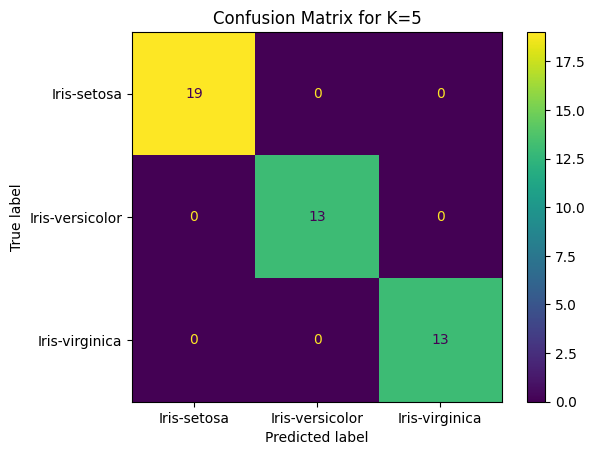

K=7, Accuracy=1.0000


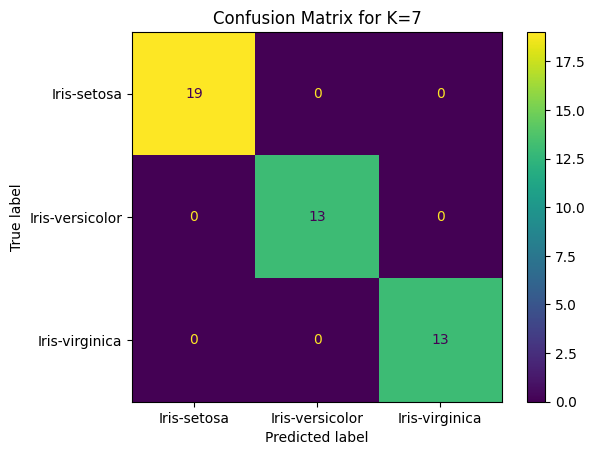

K=9, Accuracy=1.0000


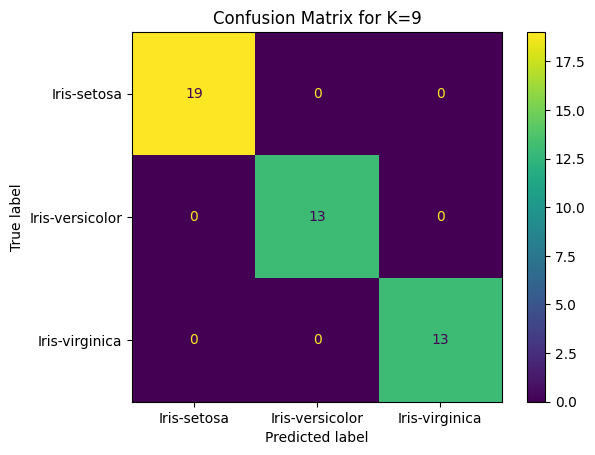

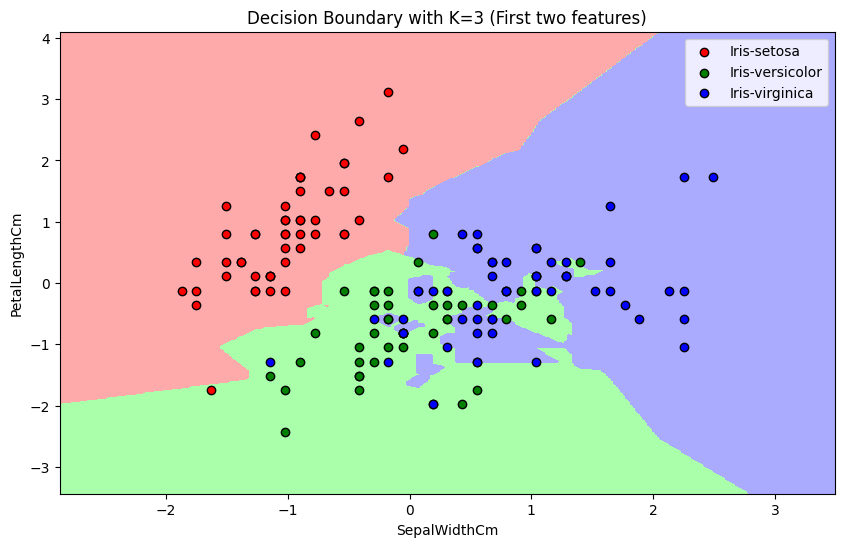

In [1]:
#  Task 6: KNN Classification using Iris Dataset

# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 2. Load dataset
df = pd.read_csv("E:/Iris.csv")
print(df.head())

# Drop Id column if present
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

# Split features and target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encode target if needed
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# 3. Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 5. Train KNN with different K values and evaluate
k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot()
    plt.title(f'Confusion Matrix for K={k}')
    plt.show()

# 6. Visualize Decision Boundaries (using first 2 features for 2D plot)
from matplotlib.colors import ListedColormap

X_vis = X_scaled[:, :2]  # First two features
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_vis, y, test_size=0.3, random_state=42)

model_vis = KNeighborsClassifier(n_neighbors=3)
model_vis.fit(X_train_v, y_train_v)

# Create meshgrid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light)
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(X_vis[y == cl, 0], X_vis[y == cl, 1],
                c=cmap_bold[idx], label=le.classes_[cl], edgecolor='k')
plt.xlabel(df.columns[1])
plt.ylabel(df.columns[2])
plt.title("Decision Boundary with K=3 (First two features)")
plt.legend()
plt.show()
